## Oneway Anova 

This is a demonstration of the oneway anova class. It can do the following things: 
- calculate a standard anova table 
- paramater estimation for mean and (co)variance 
- ICC calculation
- ml and reml estimation variations 
- residual plotting 

In [9]:
import numpy as np 
import pandas as pd 

from src.oneway_anova import OnewayAnova

# Data preperation

schooldata = pd.read_csv('data/schooldata.csv')
schooldata['ARITH_DIF'] = schooldata['POST_ARITH'] - schooldata['PRE_ARITH']
schooldata['LANG_DIF'] = schooldata['POST_LANG'] - schooldata['PRE_LANG']

In [10]:
# Creating the ANOVA class and setting the target and grouping variables 

anova = OnewayAnova(schooldata)
anova.set_groups('CLASS', 'ARITH_DIF') # grouping variable, target variable

# Getting the desired tables 
anova_table = anova.get_anova_table()
covariance_table = anova.get_covariance_table()
ICC_table = anova.get_ICC_table()

/Users/morrisboers/Documents/LDA/src/oneway_anova.py:699: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['blubs'] = all_blubs
/Users/morrisboers/Documents/LDA/src/oneway_anova.py:738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['marginal_residuals'] = all_marginal_residuals
/Users/morrisboers/Documents/LDA/src/oneway_anova.py:739: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [11]:
 # print ANOVA, covariance, ICC and maximum likelihood (ML) table 
print("ANOVA table:")
print(anova_table)
print("\n")
print("Covariance table:")
print(covariance_table)
print("\n")
print("ICC table:")
print(ICC_table)
print("\n")

ANOVA table:
           df  sums_squares  mean_sum_squares  expected_mean_squares  \
between   196  27709.539027        141.375199             142.059318   
within   3405  68825.552866         20.213085              20.213085   

         sigma_squared_estimation         F       p value  
between                  6.632008  6.994242  1.110223e-16  
within                  20.213085       NaN           NaN  


Covariance table:
           estimate  standard_error  z_value  p_value      lower      upper
group      6.632008        0.782157      0.0      NaN   5.331063   8.477681
residual  20.213085        0.489879      NaN      NaN  19.286281  21.208671
total     26.845093        0.908559      NaN      NaN  25.149697  28.718778


ICC table:
        lower       ICC     upper
ICC  0.206582  0.247047  0.295385




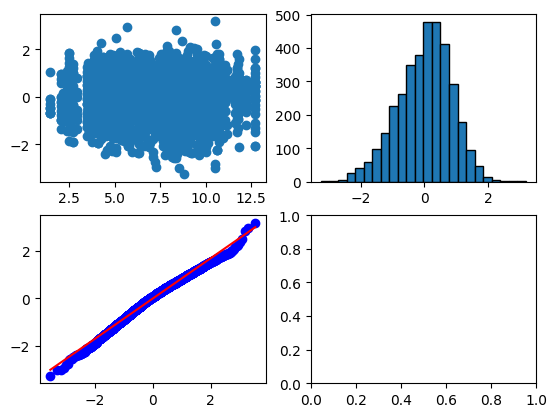

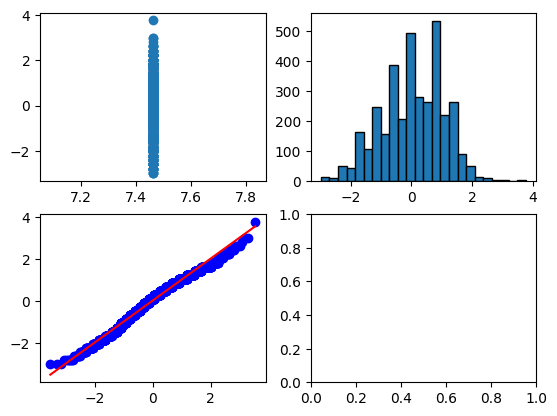

In [12]:
# plot conditional and marginal residuals 
anova.plot_residuals()

In [13]:
# only when we have balanced data (FOR NOW)
if (anova.is_balanced): 
    ML_table = anova.get_ml_table()
    REML_table = anova.get_reml_table()
    comparison_table = anova.get_comparison_table()

    print("ML table:")
    print(ML_table)
    print("\n")
    print("REML table:")
    print(REML_table)
    print("\n")
    print("Comparison of anova, ml and reml estimators:")
    print(comparison_table)
    print("\n")

## Two way ANOVA 

This study will explore the nested mixed effects model:
it means that there is at least one fixed effect and at least one random effect which are nested within each other. 
- fixed effect means that we have included all levels of the variable so there is no variance in the variable(not modeled randomly) https://influentialpoints.com/Training/one-way_fixed_effects_anova-principles-properties-assumptions.htm 
- random effect means that we have included a random sample of the levels so it has grouping variance (modeled randomly)
https://stattrek.com/anova/completely-randomized/one-way

in this two way nested anova we make the assumption that there is equality in variation in each nested component